In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

C:\Users\SAMPARK\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Load the CSV file 
df = pd.read_csv(r"D:\downloads1\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
#Checking how many rows and columns are there 
df.shape

(545, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
#Checking if there are any null values 
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
#Statictics of the data, there are comulms which datatype is object  
df.describe(include='all')

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545,545,545,545,545,545.000000,545,545
unique,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,2,3
top,NaN,NaN,NaN,NaN,NaN,yes,no,no,no,no,NaN,no,semi-furnished
freq,NaN,NaN,NaN,NaN,NaN,468,448,354,520,373,NaN,417,227
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,NaN,NaN,NaN,NaN,NaN,0.693578,NaN,NaN
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,NaN,NaN,NaN,NaN,NaN,0.861586,NaN,NaN
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN


In [8]:
# Here we using the label encoder to transform object columns into binary clasification 
from sklearn.preprocessing import LabelEncoder

def Encoding_(df):
    df_cat = df.select_dtypes(include=['object']).copy()
    df_num = df.select_dtypes(exclude=['object']).copy()

    for col in df_cat.columns:
        le = LabelEncoder()
        df_cat[col] = le.fit_transform(df_cat[col])
    a=[df_cat, df_num]
    df_n=pd.concat(a,axis=1)


    return df_n

In [9]:
df=Encoding_(df)

In [10]:
df.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price,area,bedrooms,bathrooms,stories,parking
0,1,0,0,0,1,1,0,13300000,7420,4,2,3,2
1,1,0,0,0,1,0,0,12250000,8960,4,4,4,3
2,1,0,1,0,0,1,1,12250000,9960,3,2,2,2
3,1,0,1,0,1,1,0,12215000,7500,4,2,2,3
4,1,1,1,0,1,0,0,11410000,7420,4,1,2,2


In [11]:
df.describe()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price,area,bedrooms,bathrooms,stories,parking
count,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,0.858716,0.177982,0.350459,0.045872,0.315596,0.234862,1.069725,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,0.348635,0.382849,0.477552,0.209399,0.465180,0.424302,0.761373,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
#Checking the correlation 
df.corr()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price,area,bedrooms,bathrooms,stories,parking
mainroad,1.000000,0.092337,0.044002,-0.011781,0.105423,0.199876,-0.156726,0.296898,0.288874,-0.012033,0.042398,0.121706,0.204433
guestroom,0.092337,1.000000,0.372066,-0.010308,0.138179,0.160897,-0.118328,0.255517,0.140297,0.080549,0.126469,0.043538,0.037466
basement,0.044002,0.372066,1.000000,0.004385,0.047341,0.228083,-0.112831,0.187057,0.047417,0.097312,0.102106,-0.172394,0.051497
hotwaterheating,-0.011781,-0.010308,0.004385,1.000000,-0.130023,-0.059411,-0.031628,0.093073,-0.009229,0.046049,0.067159,0.018847,0.067864
airconditioning,0.105423,0.138179,0.047341,-0.130023,1.000000,0.117382,-0.150477,0.452954,0.222393,0.160603,0.186915,0.293602,0.159173
prefarea,0.199876,0.160897,0.228083,-0.059411,0.117382,1.000000,-0.107686,0.329777,0.234779,0.079023,0.063472,0.044425,0.091627
furnishingstatus,-0.156726,-0.118328,-0.112831,-0.031628,-0.150477,-0.107686,1.000000,-0.304721,-0.171445,-0.123244,-0.143559,-0.104672,-0.177539
price,0.296898,0.255517,0.187057,0.093073,0.452954,0.329777,-0.304721,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.288874,0.140297,0.047417,-0.009229,0.222393,0.234779,-0.171445,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,-0.012033,0.080549,0.097312,0.046049,0.160603,0.079023,-0.123244,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270


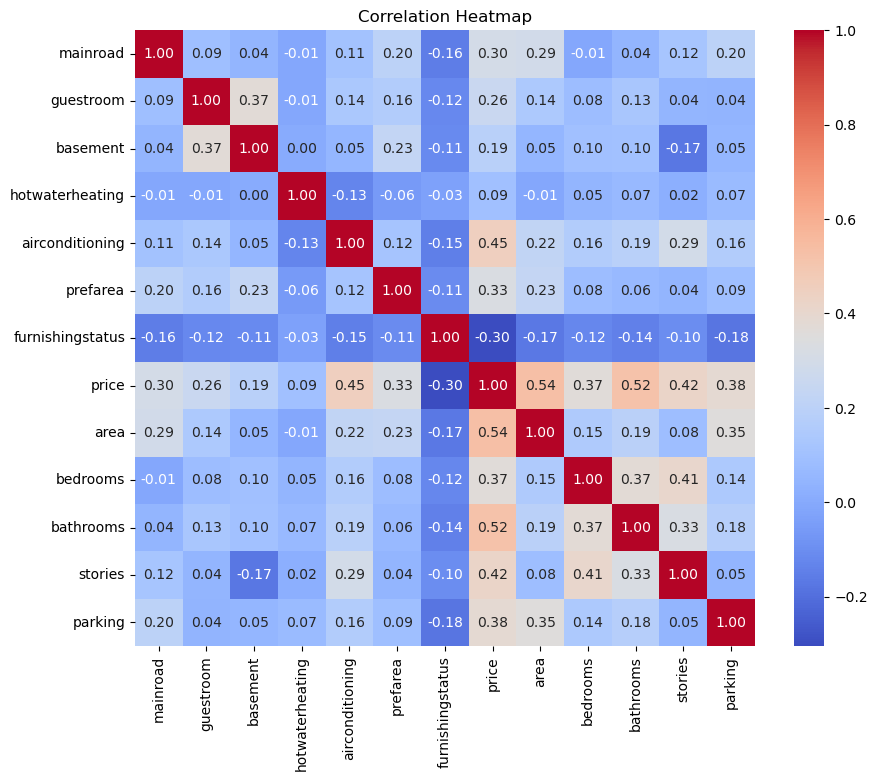

In [13]:
#visulization the correlation 
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

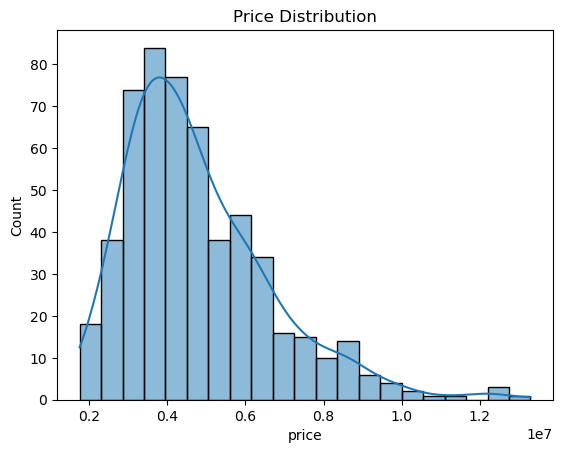

In [14]:
#Exploratory data analysis 
sns.histplot(df['price'], kde=True)
plt.title('Price Distribution')
plt.show()

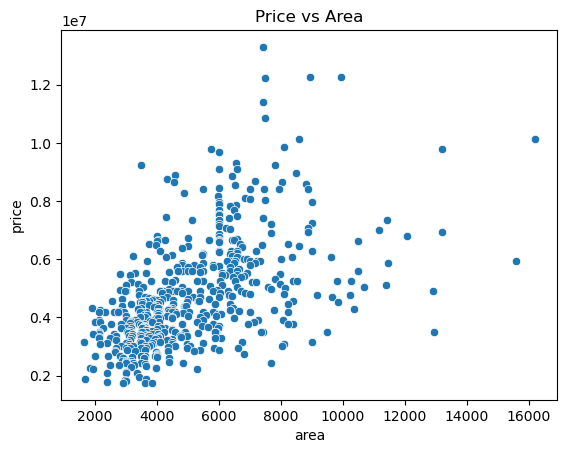

In [15]:
sns.scatterplot(x='area', y='price', data=df)
plt.title('Price vs Area')
plt.show()

In [16]:
df.columns

Index(['mainroad', 'guestroom', 'basement', 'hotwaterheating',
       'airconditioning', 'prefarea', 'furnishingstatus', 'price', 'area',
       'bedrooms', 'bathrooms', 'stories', 'parking'],
      dtype='object')

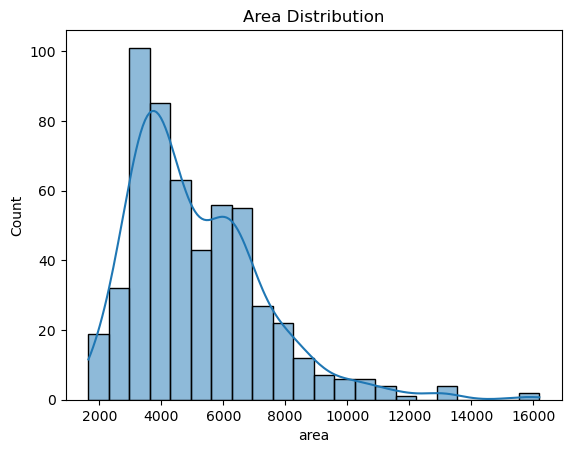

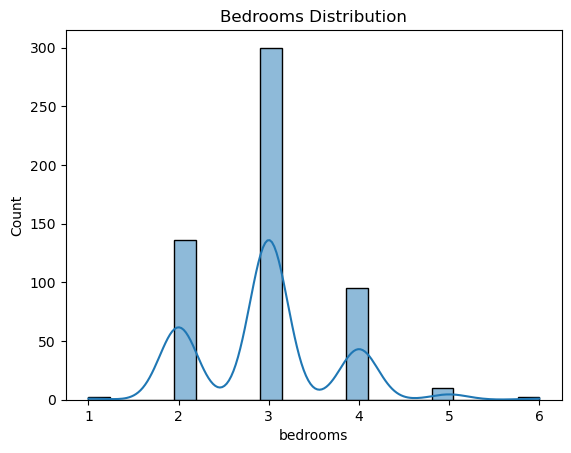

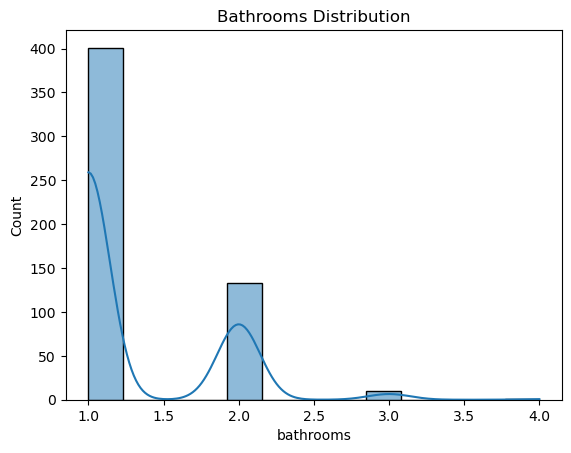

In [17]:
# Area Distribution
sns.histplot(df['area'], kde=True)
plt.title('Area Distribution')
plt.show()

# Bedrooms Distribution
sns.histplot(df['bedrooms'], kde=True)
plt.title('Bedrooms Distribution')
plt.show()

# Bathrooms Distribution
sns.histplot(df['bathrooms'], kde=True)
plt.title('Bathrooms Distribution')
plt.show()

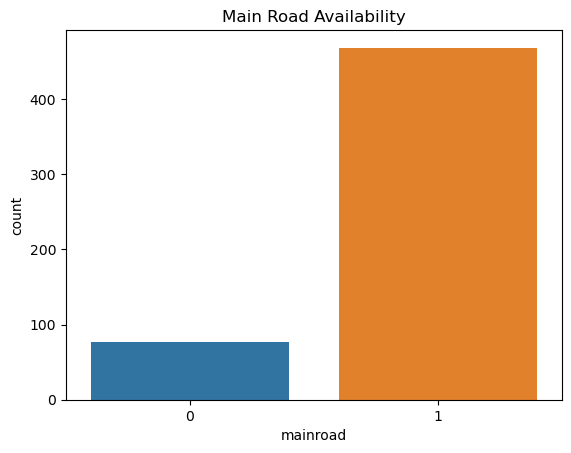

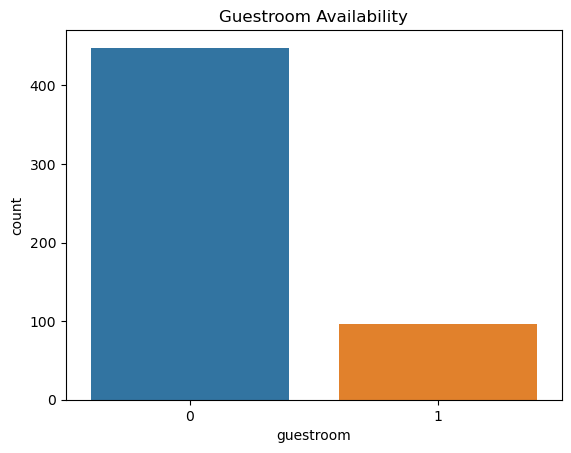

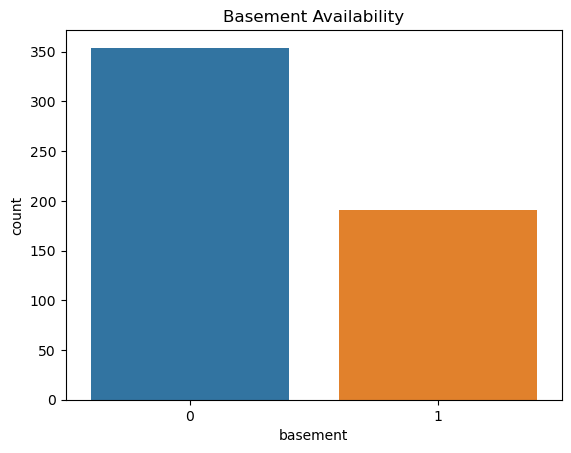

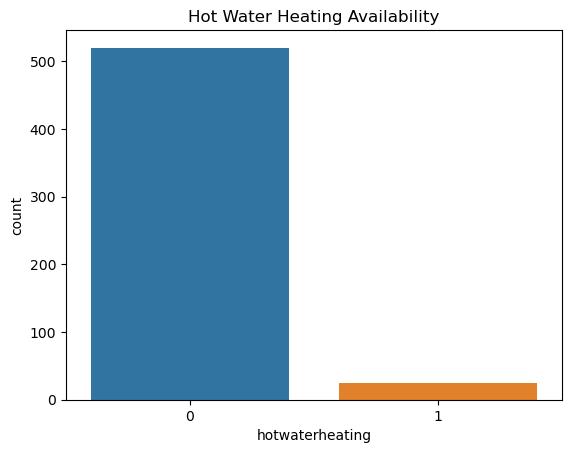

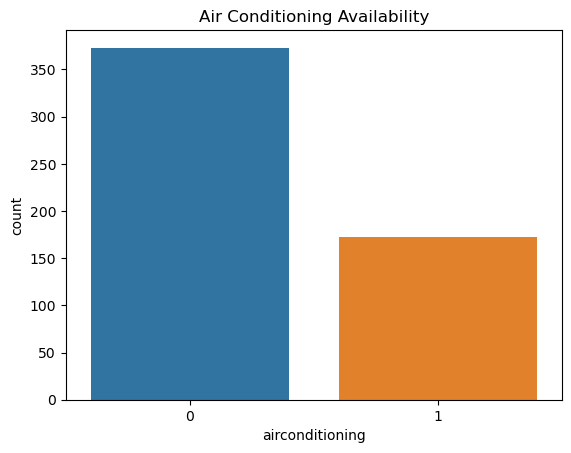

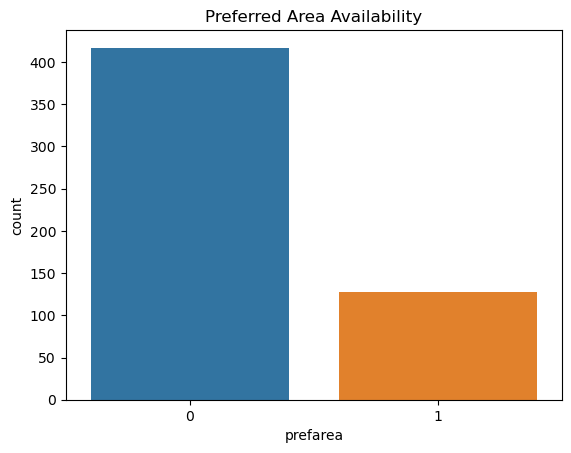

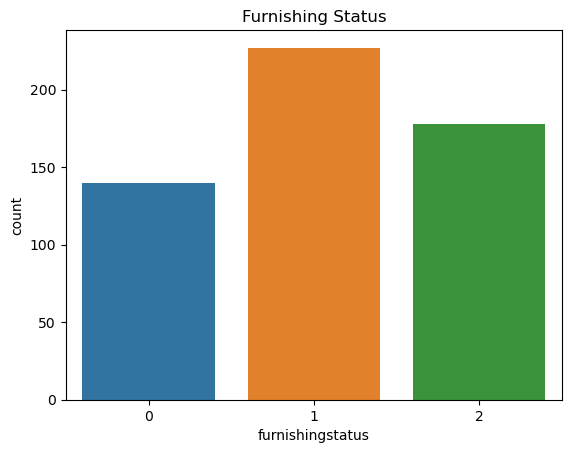

In [18]:
# Countplot for Categorical Features
sns.countplot(x='mainroad', data=df)
plt.title('Main Road Availability')
plt.show()

sns.countplot(x='guestroom', data=df)
plt.title('Guestroom Availability')
plt.show()

sns.countplot(x='basement', data=df)
plt.title('Basement Availability')
plt.show()

sns.countplot(x='hotwaterheating', data=df)
plt.title('Hot Water Heating Availability')
plt.show()

sns.countplot(x='airconditioning', data=df)
plt.title('Air Conditioning Availability')
plt.show()

sns.countplot(x='prefarea', data=df)
plt.title('Preferred Area Availability')
plt.show()

sns.countplot(x='furnishingstatus', data=df)
plt.title('Furnishing Status')
plt.show()

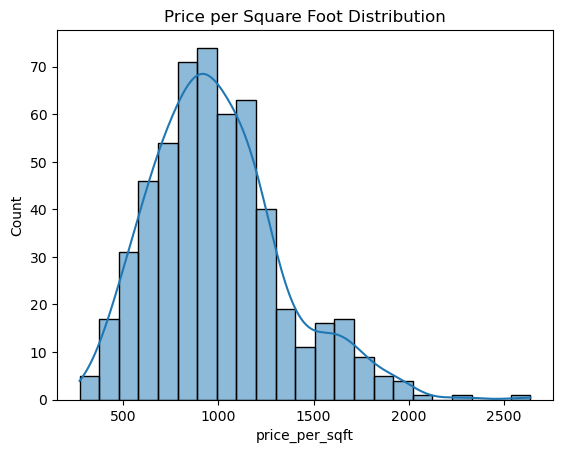

In [19]:
# Create price per square foot feature
df['price_per_sqft'] = df['price'] / df['area']

# Visualize the new feature
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Price per Square Foot Distribution')
plt.show()

In [ ]:
## Model Building 

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [23]:
X = df.drop(columns=['price'])  # All columns except 'price'
y = df['price']  # Target variable

In [24]:
#Scaling the data 
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X)

In [25]:
X_num_scaled

array([[ 0.40562287, -0.46531479, -0.73453933, ...,  1.37821692,
         1.51769249,  2.30815165],
       [ 0.40562287, -0.46531479, -0.73453933, ...,  2.53202371,
         2.67940935,  1.0798384 ],
       [ 0.40562287, -0.46531479,  1.3613975 , ...,  0.22441013,
         1.51769249,  0.68336149],
       ...,
       [ 0.40562287, -0.46531479, -0.73453933, ..., -0.92939666,
        -0.80574124, -1.47277195],
       [-2.46534421, -0.46531479, -0.73453933, ..., -0.92939666,
        -0.80574124, -1.13209402],
       [ 0.40562287, -0.46531479, -0.73453933, ...,  0.22441013,
        -0.80574124, -1.55618725]])

In [26]:
X_num_scaled.shape

(545, 13)

In [27]:
y.shape

(545,)

In [28]:
X_scaled = pd.DataFrame(X_num_scaled, columns=X.columns)
X_scaled.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area,bedrooms,bathrooms,stories,parking,price_per_sqft
0,0.405623,-0.465315,-0.734539,-0.219265,1.472618,1.804941,-1.406286,1.046726,1.403419,1.421812,1.378217,1.517692,2.308152
1,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,-1.406286,1.757010,1.403419,5.405809,2.532024,2.679409,1.079838
2,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,-0.091662,2.218232,0.047278,1.421812,0.224410,1.517692,0.683361
3,0.405623,-0.465315,1.361397,-0.219265,1.472618,1.804941,-1.406286,1.083624,1.403419,1.421812,0.224410,2.679409,1.835081
4,0.405623,2.149083,1.361397,-0.219265,1.472618,-0.554035,-1.406286,1.046726,1.403419,-0.570187,0.224410,1.517692,1.572441


In [29]:
#Performing train test split, test size is 20% of the data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
X_train.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area,bedrooms,bathrooms,stories,parking,price_per_sqft
46,0.405623,-0.465315,-0.734539,-0.219265,1.472618,-0.554035,-1.406286,0.391790,0.047278,1.421812,2.532024,0.355976,0.753395
93,0.405623,-0.465315,1.361397,-0.219265,1.472618,-0.554035,-0.091662,0.945257,0.047278,1.421812,-0.929397,2.679409,-0.341769
335,0.405623,-0.465315,1.361397,-0.219265,1.472618,-0.554035,-1.406286,-0.615521,-1.308863,-0.570187,-0.929397,1.517692,0.097992
412,0.405623,-0.465315,1.361397,-0.219265,-0.679063,1.804941,1.222962,-1.171756,0.047278,-0.570187,0.224410,-0.805741,0.926724
471,0.405623,-0.465315,-0.734539,-0.219265,-0.679063,-0.554035,1.222962,-0.645962,0.047278,-0.570187,0.224410,-0.805741,-0.550693


In [31]:
# Implimenting Linear Regression model 
model = LinearRegression()

In [32]:
model.fit(X_train, y_train)

LinearRegression()

In [33]:
len(X_train)

436

In [34]:
len(X_test)

109

In [35]:
y_pred = model.predict(X_test)

In [36]:
y_pred

array([4143923.32609424, 6528290.38230498, 3292488.42468568,
       5691825.33802675, 2560644.30944081, 4226531.51820169,
       5657355.14673524, 4935732.86530257, 2415176.3351871 ,
       3289947.27717145, 9178626.71388625, 2432867.17521266,
       3253176.38810618, 3163104.00240291, 2277219.02944773,
       3641171.98628182, 3597866.30198998, 6186503.06214684,
       3267849.80679991, 2998851.66300182, 6305246.74492268,
       5432613.49113491, 1750389.14344095, 5366906.00795034,
       4791776.60638641, 8838397.67384847, 3282203.46092353,
       6224542.74043726, 9102679.1509052 , 2588899.52368433,
       7126522.78676146, 3685357.9710025 , 6655165.34648761,
       3394239.44121461, 3133248.63006905, 4885974.83945003,
       4782938.43808574, 3805631.15880915, 3444703.93454134,
       3030122.41171108, 5085787.64322539, 3838778.47779761,
       6523271.23739001, 4481665.87118341, 3397918.33848257,
       4458348.38731676, 6477871.6555923 , 4951804.44988598,
       3842601.63448427,

In [39]:
# Evaluating the model 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 503245.29740989994
Mean Squared Error (MSE): 586676606817.3195
Root Mean Squared Error (RMSE): 765948.1750205555
R-squared (R²): 0.8839314564398744


In [40]:
from sklearn.metrics import explained_variance_score

# Calculate Explained Variance Score
evs = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score: {evs}")

Explained Variance Score: 0.8854135568602213


In [41]:
# Checking the threshold for accuracy of the model 
threshold = 0.1

# Calculate the percentage of predictions within 10% of actual values
accuracy = np.mean(np.abs((y_pred - y_test) / y_test) <= threshold) * 100
print(f"Accuracy within {threshold * 100}%: {accuracy}%")

Accuracy within 10.0%: 66.05504587155964%


In [42]:
# Here building another model Random forest Regressor 
from sklearn.ensemble import RandomForestRegressor

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
model1 = RandomForestRegressor(n_estimators=100, random_state=42)
model1.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
#checking the predictions of the model 
y_pred1 = model1.predict(X_test)

In [45]:
y_pred1

array([ 3965430. ,  6829089.4,  3686480. ,  6070610. ,  2699256. ,
        4895415. ,  5060370. ,  4570650. ,  2481881.5,  3614432.5,
        9414848.8,  2646490. ,  3408090. ,  3256120. ,  2234820. ,
        2511274.5,  3115577.5,  7456820. ,  3292555. ,  3355590. ,
        6627390. ,  5426540. ,  1934660. ,  4854500. ,  4333070. ,
        9256240. ,  3098690. ,  5144615. ,  6836760. ,  2658841.5,
        6650840. ,  3564330. ,  6803580. ,  3506790. ,  3306170. ,
        4300870. ,  4907700. ,  3336445. ,  3519145. ,  2620240. ,
        5129670. ,  3702265. ,  6785800. ,  4888800. ,  3374770. ,
        4236050. ,  6800500. ,  5511170. ,  3052560. ,  2005500. ,
        8204854. ,  2618024.5,  4283370. ,  4062240. ,  3303300. ,
        1923460. ,  7987525. ,  2533650. ,  4391730. ,  3074400. ,
        3938900. ,  3585158.5,  4749290. ,  3212160. ,  4563440. ,
        5848010. ,  6781938.8,  4903220. ,  4549510. ,  5995360. ,
        3832755.5,  5688130. ,  3796800. ,  6607160. ,  335507

In [46]:
#Evaluating the model  
mae1 = mean_absolute_error(y_test, y_pred1)
mse1 = mean_squared_error(y_test, y_pred1)
rmse1 = np.sqrt(mse)
r2 = r2_score(y_test, y_pred1)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 503245.29740989994
Mean Squared Error (MSE): 586676606817.3195
Root Mean Squared Error (RMSE): 765948.1750205555
R-squared (R²): 0.9342128099452656


In [47]:
#Checking the threshold 
threshold = 0.1

# Calculate the percentage of predictions within 10% of actual values
accuracy = np.mean(np.abs((y_pred1 - y_test) / y_test) <= threshold) * 100
print(f"Accuracy within {threshold * 100}%: {accuracy}%")

Accuracy within 10.0%: 85.3211009174312%
